In [1]:
# %matplotlib inline
%time from hikyuu.interactive import *

2025-11-02 10:33:30,636 [INFO] runing in interactive session [<module>] (F:\anaconda\envs\hikyuu_hub\Lib\site-packages\hikyuu\__init__.py:131) [hikyuu::hku_info]
2025-11-02 10:33:30,652 [INFO] running in jupyter [<module>] (F:\anaconda\envs\hikyuu_hub\Lib\site-packages\hikyuu\__init__.py:138) [hikyuu::hku_info]


2025-11-02 10:33:30.658 [HKU-I] - Plugin path: F:\anaconda\envs\hikyuu_hub\Lib\site-packages\hikyuu\plugin (StockManager.cpp:113)
2025-11-02 10:33:30.751 [HKU-I] - Using SQLITE3 BaseInfoDriver (BaseInfoDriver.cpp:57)
2025-11-02 10:33:30.753 [HKU-I] - 加载市场信息…… (StockManager.cpp:704)
2025-11-02 10:33:30.754 [HKU-I] - 加载证券类型信息…… (StockManager.cpp:722)
2025-11-02 10:33:30.755 [HKU-I] - 加载证券信息…… (StockManager.cpp:602)
2025-11-02 10:33:30.960 [HKU-I] - 加载权息数据…… (StockManager.cpp:740)
2025-11-02 10:33:31.046 [HKU-I] - 加载板块信息…… (StockManager.cpp:182)
2025-11-02 10:33:31.336 [HKU-I] - 加载K线数据…… (StockManager.cpp:186)
2025-11-02 10:33:31.337 [HKU-I] - 预加载 day K线数据至缓存 (最大数量: 100000)! (StockManager.cpp:231)
2025-11-02 10:33:31.338 [HKU-I] - 0.59 秒数据加载完毕. (StockManager.cpp:193)
CPU times: total: 3.45 s
Wall time: 4 s


In [29]:
s = sm['sz000001']
k = s.get_kdata(Query(-100))


#抽取K线收盘价指标，一般指标计算参数只能是指标类型，所以必须先将K线数据生成指标类型
c = CLOSE(k)

#计算收盘价的EMA指标
a = EMA(c)

#绘制指标
c.plot(legend_on=True)
a.plot(new=False, legend_on=True)

#绘制柱状图
a.bar()

#修正下柱状图，使其更美观
PRICELIST([x-9 for x in a]).bar()

indicator is None
indicator is None
indicator is None
indicator is None


In [12]:
print("k is a instance of KData:\n", k)
print("--------------------------\n")

kind = KDATA(k)

# 可以清楚看到6个结果集
print("kind is a instance of Indicator:\n", kind)

k is a instance of KData:
 KData{
  size : 100
  stock: Stock(SZ, 000001, 平安银行, A股, 1, 1991-04-03 00:00:00, +infinity),
  query: KQuery(-100, 9223372036854775807, INDEX, DAY, NO_RECOVER)
  first: KRecord(Datetime(20250606000000), 11.7000, 11.7900, 11.6800, 11.7000, 79990.0000, 682352.0000)
  last: KRecord(Datetime(20251031000000), 11.3800, 11.4000, 11.3000, 11.3200, 109917.9000, 970192.0000)
}
--------------------------

kind is a instance of Indicator:
 Indicator{
  name: KDATA
  size: 100
  discard: 0
  result sets: 6
  params: params[kdata(KData): SZ000001, kpart(string): KDATA, ]
  support indicator param: False
  formula: KDATA
  first: 2025-06-06 00:00:00
  last: 2025-10-31 00:00:00
  values0: [11.7, 11.73, 11.72, ..., 11.46, 11.38, 11.38]
  values1: [11.79, 11.75, 11.89, ..., 11.46, 11.47, 11.4]
  values2: [11.68, 11.65, 11.71, ..., 11.36, 11.36, 11.3]
  values3: [11.7, 11.71, 11.81, ..., 11.39, 11.38, 11.32]
  values4: [79990, 90509.3, 168902, ..., 110078, 107718, 109918]
  val

In [5]:
#获取 ind 的结果集数量，如MACD通常返回3个结果集
r = kind.get_result_num()
print("result_num: ", r)

#获取第一个结果集
x = kind.get_result(0)
print(x)

result_num:  6
Indicator{
  name: IndicatorImp
  size: 100
  discard: 0
  result sets: 1
  params: params[kdata(KData): Null, ]
  support indicator param: False
  formula: IndicatorImp
  values0: [11.7, 11.73, 11.72, ..., 11.46, 11.38, 11.38]
}


In [11]:
c1 = CLOSE(k)
c2 = KDATA_PART(k, 'close')

c1.get_result_num();
print("result_num: ", r)
print("kind is a instance of Indicator:\n", c1)

result_num:  6
kind is a instance of Indicator:
 Indicator{
  name: CLOSE
  size: 100
  discard: 0
  result sets: 1
  params: params[kdata(KData): SZ000001, kpart(string): CLOSE, ]
  support indicator param: False
  formula: CLOSE
  first: 2025-06-06 00:00:00
  last: 2025-10-31 00:00:00
  values0: [11.7, 11.71, 11.81, ..., 11.39, 11.38, 11.32]
}


Indicator{
  name: EMA
  size: 100
  discard: 0
  result sets: 1
  params: params[kdata(KData): SZ000001, n(int): 22, ]
  support indicator param: True
  ind params: {}
  formula: EMA(CLOSE)
  first: 2025-06-06 00:00:00
  last: 2025-10-31 00:00:00
  values0: [11.7, 11.7009, 11.7104, ..., 11.5141, 11.5025, 11.4866]
}
get_param: 22


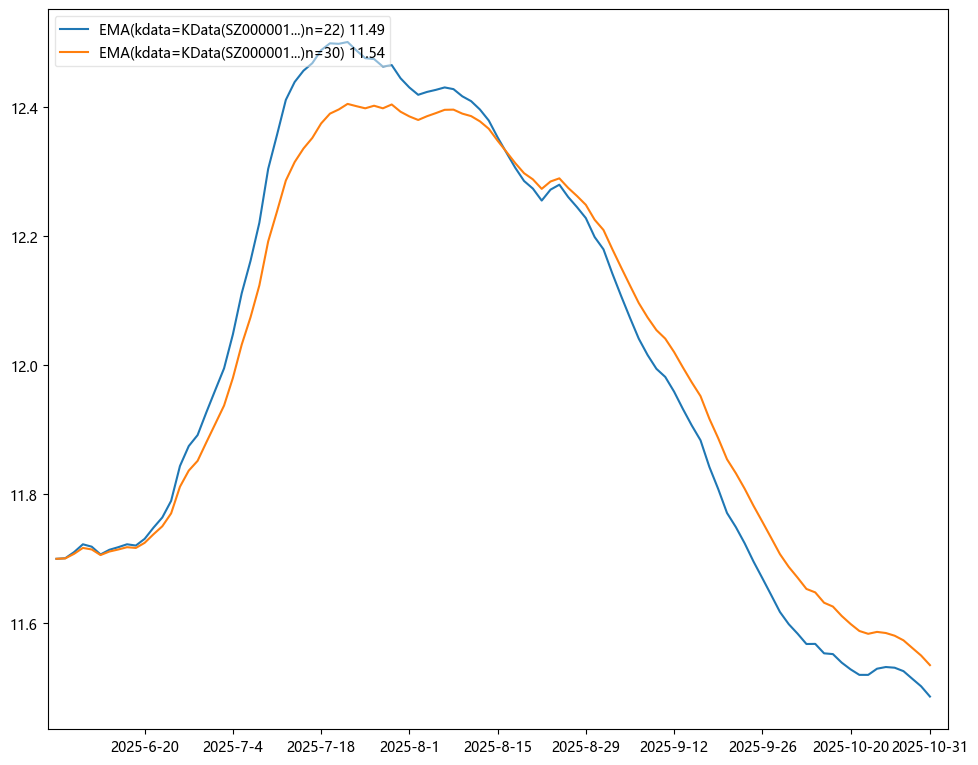

In [20]:
# 2.2 Indicator的特性与参数
# 每一个指标函数，如EMA、HHV，调用后生成一个ind对象，该对象本身可以再次调用生成新的ind。无论指标函数还是 ind 对象调用生成 ind，都是立刻进行计算。

e = EMA(c)
print(e)

print("get_param: " + str(e.get_param('n')))
e.plot(legend_on=True)

e.set_param('n', 30)
e = e(c)
e.plot(new = False, legend_on=True)

Indicator{
  name: TA_SMA
  size: 100
  discard: 29
  result sets: 1
  params: params[kdata(KData): SZ000001, n(int): 30, ]
  support indicator param: True
  ind params: {}
  formula: TA_SMA(CLOSE)
  first: 2025-06-06 00:00:00
  last: 2025-10-31 00:00:00
  values0: [nan, nan, nan, ..., 11.5027, 11.4897, 11.472]
}
29


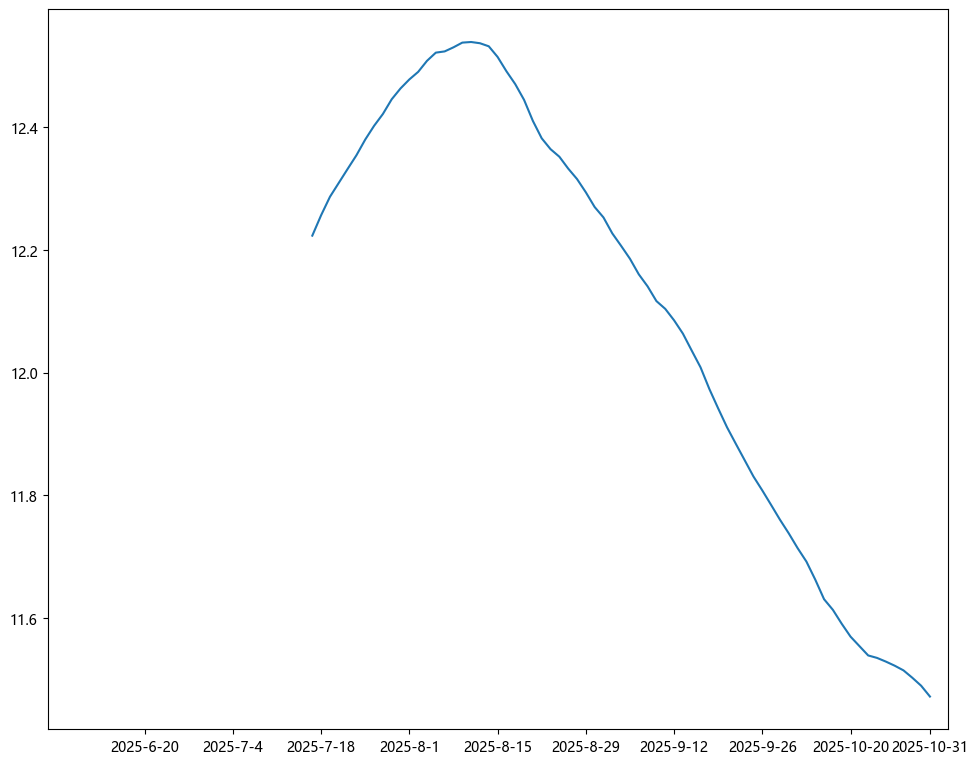

In [22]:
# 2.3 TA-Lib包装指标
# 在交互工具里对TA-Lib进行了包装，命名方式统一为 TA_FUNC名称。其中，ta-lib指标的lookback属性，用discard属性代替。

x = TA_SMA(CLOSE(k))
print(x)
x.plot()
print(x.discard)



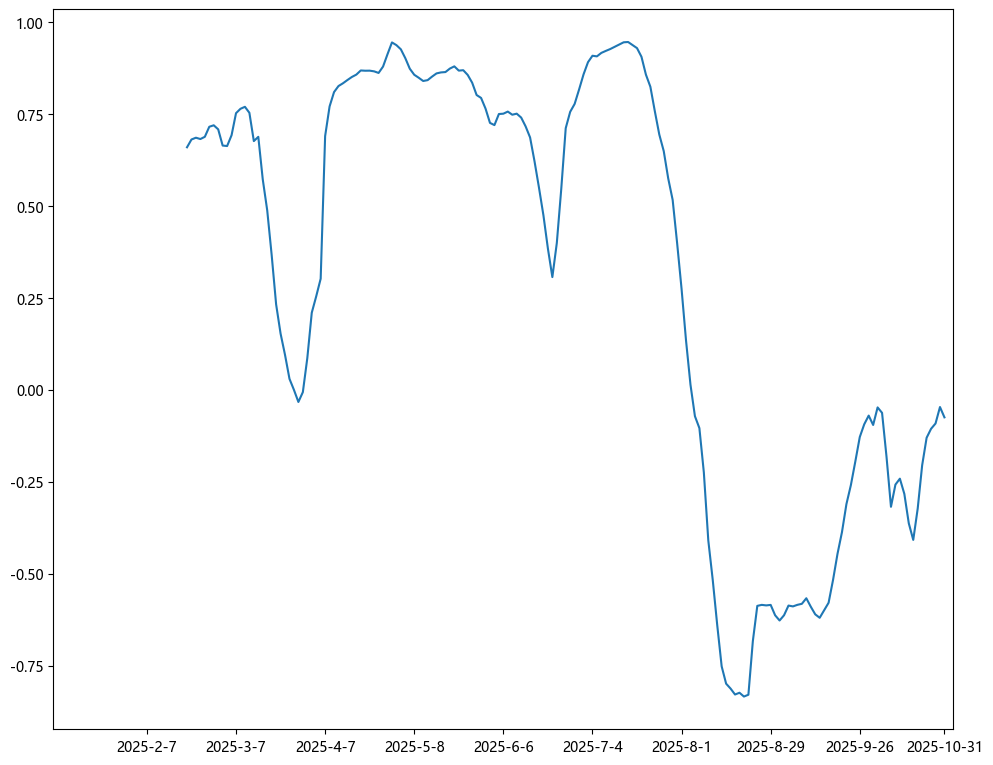

In [23]:
query = Query(-200)
k1 = sm['sh000001'].get_kdata(query)
k2 = sm['sz000001'].get_kdata(query)

cr = TA_CORREL(CLOSE(k1), CLOSE(k2))
cr.plot()

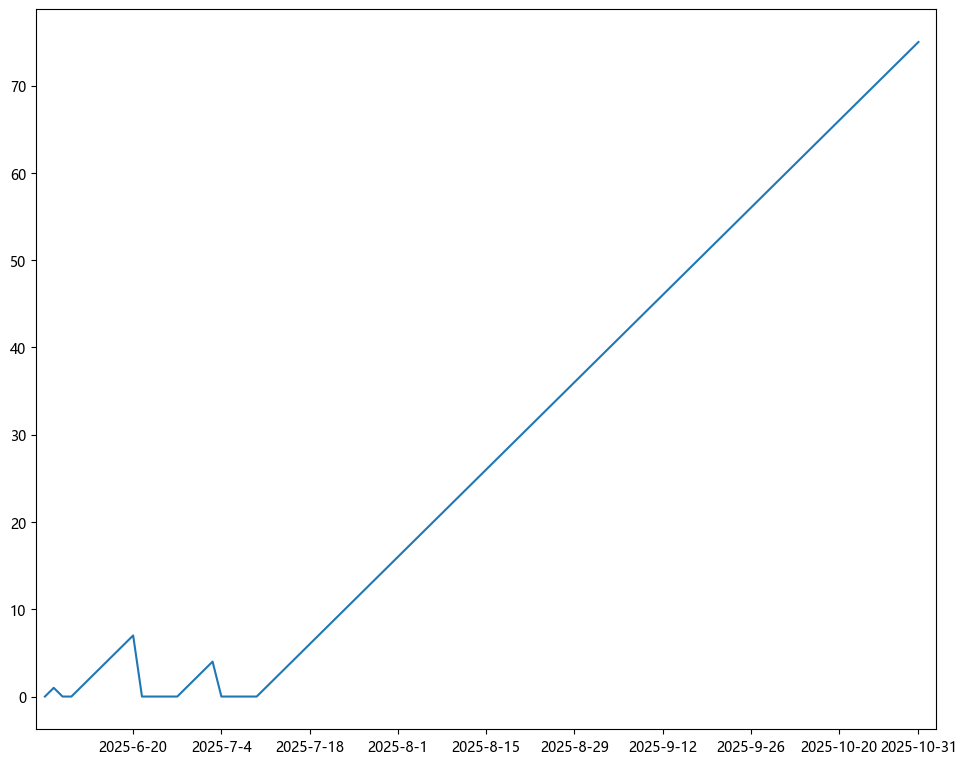

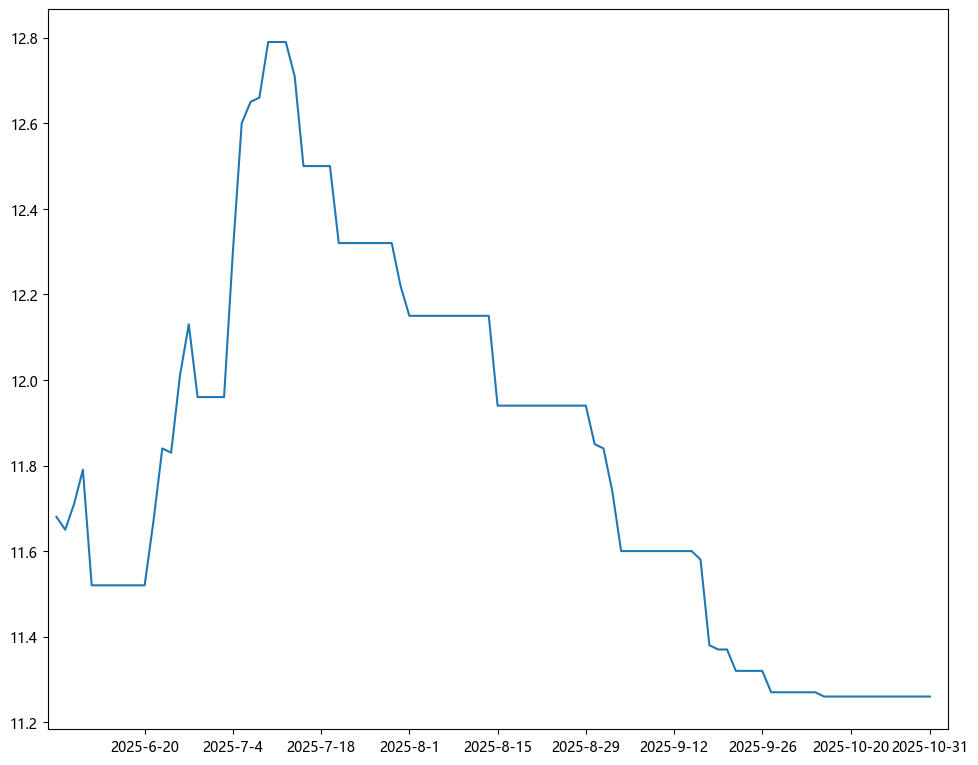

In [27]:
# 2.4 动态指标参数
# 在通道信等证券行情软件中，其技术指标中的窗口参数通常支持整数，也支持使用指标，如：

# T1:=HHVBARS(H,120); {120内的最高点距今天的天数}
# L120:=LLV(L,T1+1); {120内的最高点至今，这个区间的最低点}


h = HIGH(k)
l = LOW(k)
T1 = HHVBARS(h, 120)

# T1.plot()
#print(f"120天内的最高点距今天的天数:{T1}")

L120 = LLV(l, T1+1)
L120.plot()